In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('source/Social_Network_Ads.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Summarize numerical data

df[['Age', 'EstimatedSalary', 'Purchased']].describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


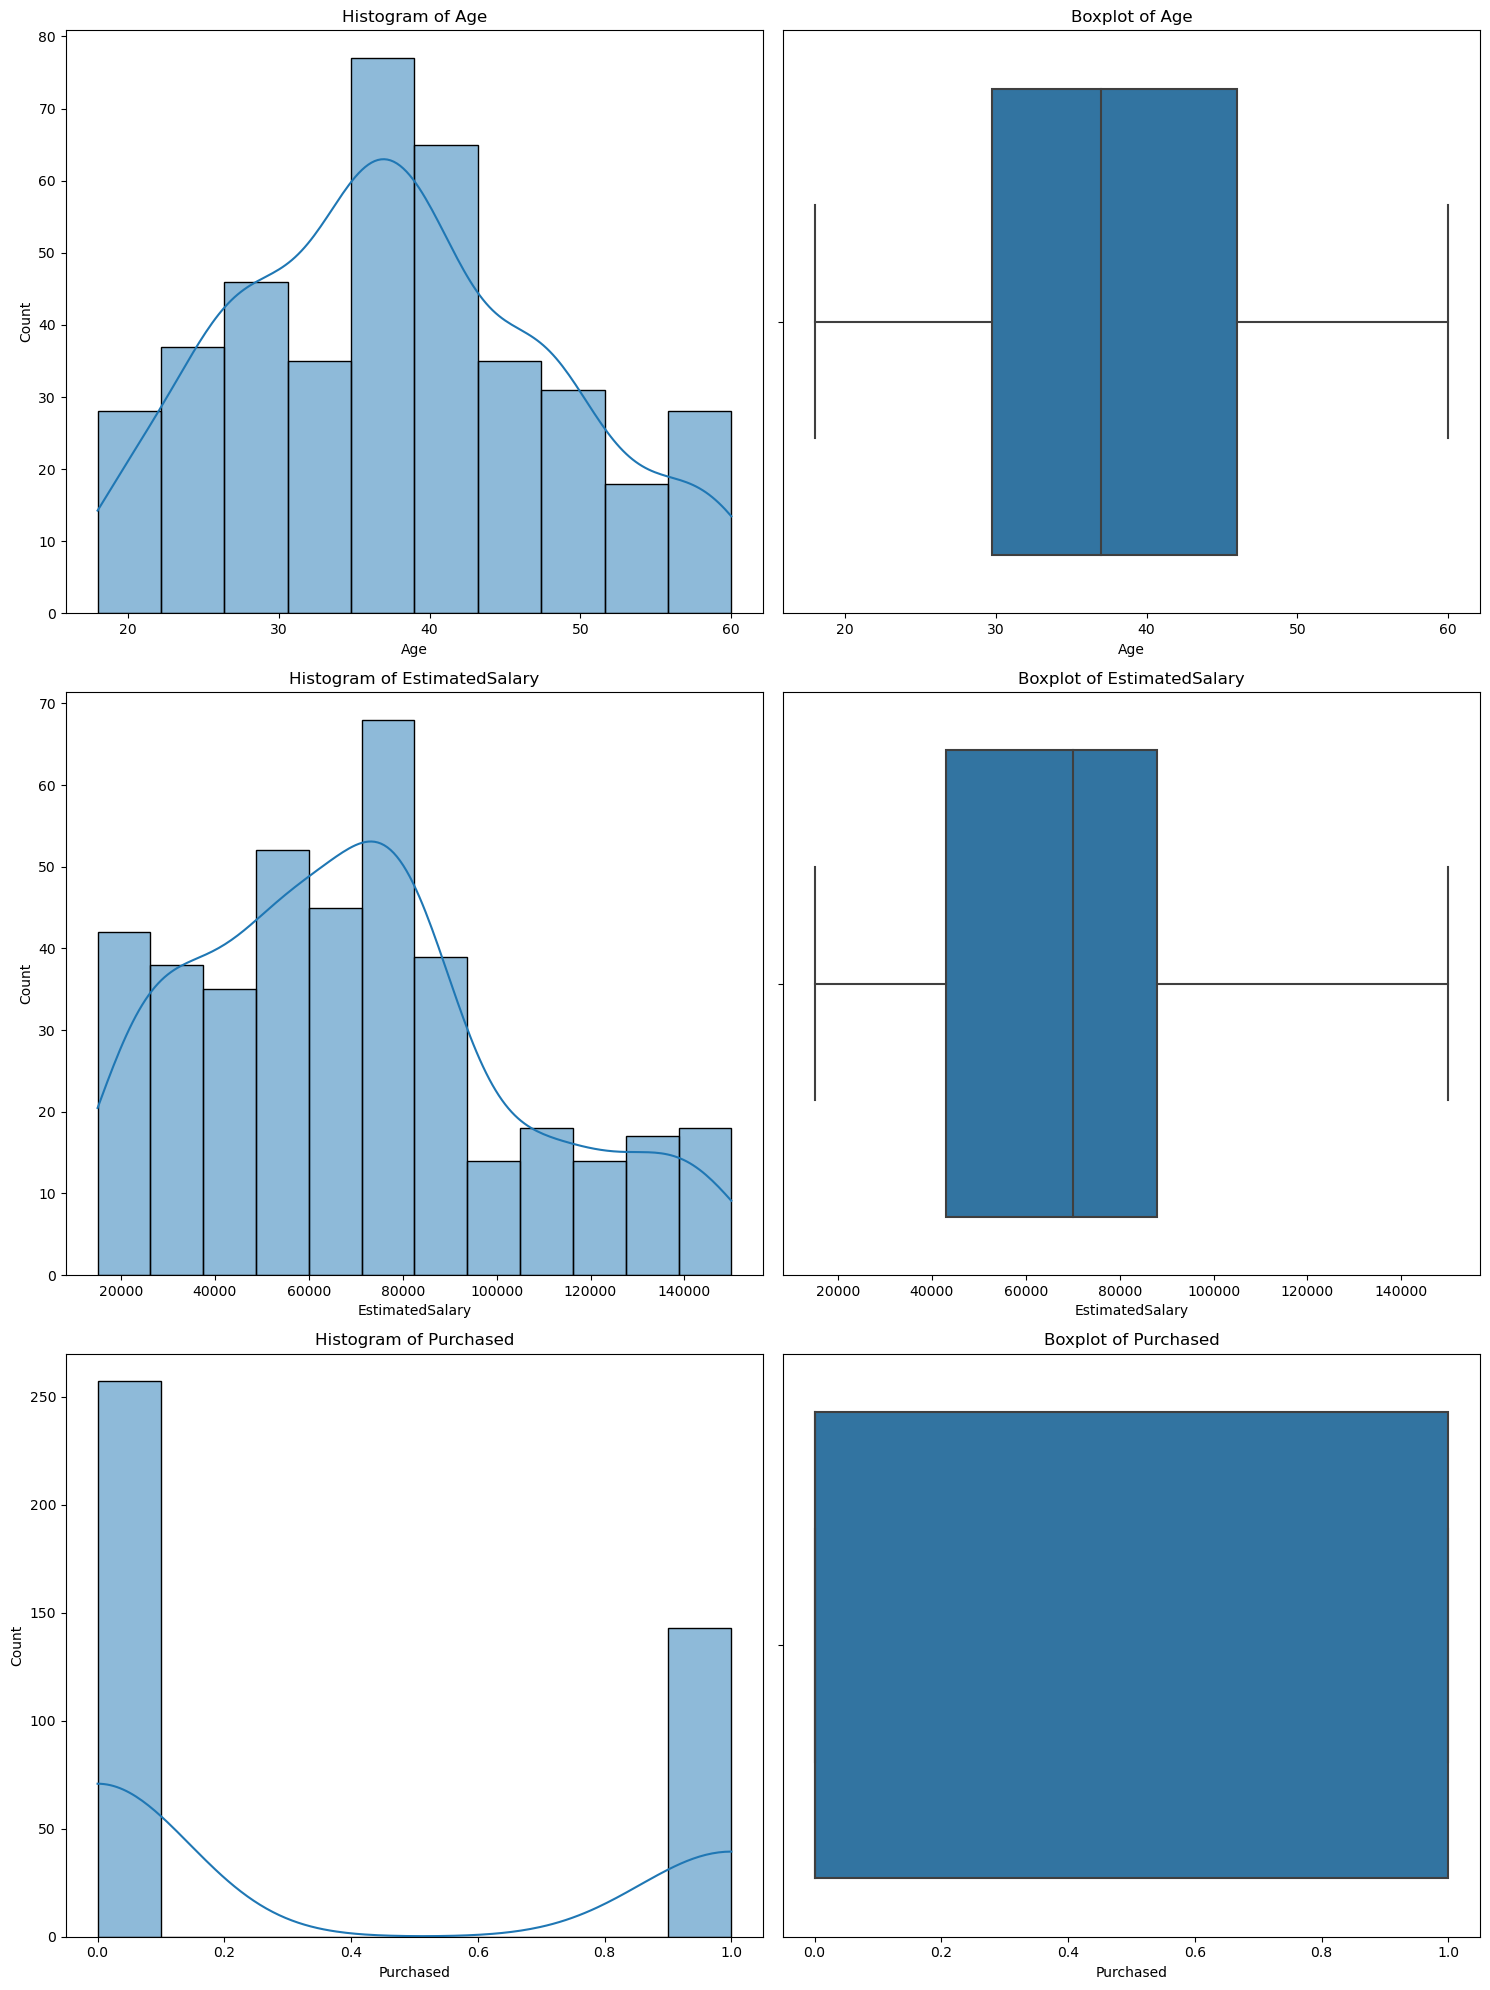

In [4]:
columns = ['Age', 'EstimatedSalary', 'Purchased']

fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for i, column in enumerate(columns):
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

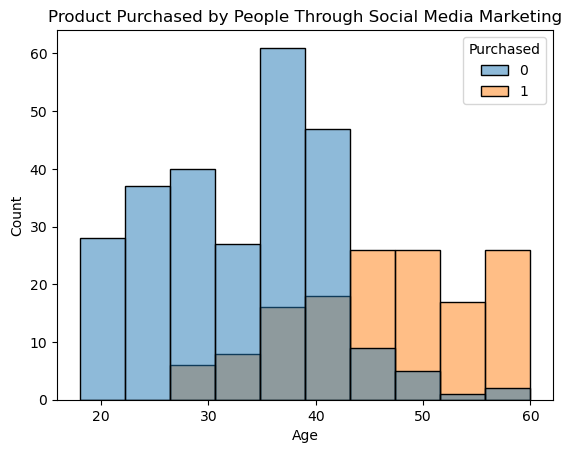

In [5]:
sns.histplot(x='Age', hue='Purchased', data=df)

plt.title('Product Purchased by People Through Social Media Marketing')

plt.show()

NOTE:

The visualization above shows that people over 45 among the target audience are more interested in purchasing the product.

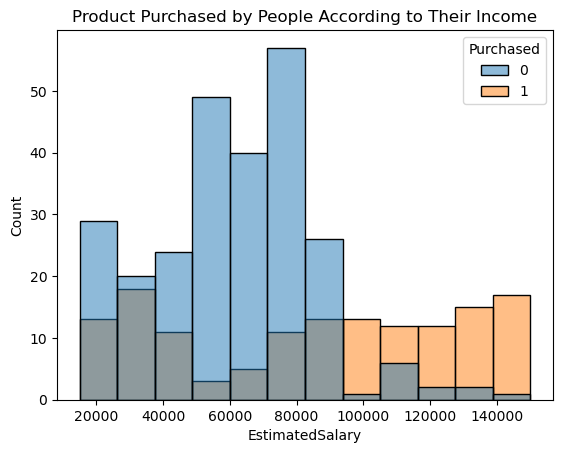

In [6]:
plt.title('Product Purchased by People According to Their Income')
sns.histplot(data=df, x='EstimatedSalary', hue='Purchased')
plt.show()

NOTE:

The visualization above shows that people with a monthly income of over 90,000 among the target audience are more interested in purchasing the product.

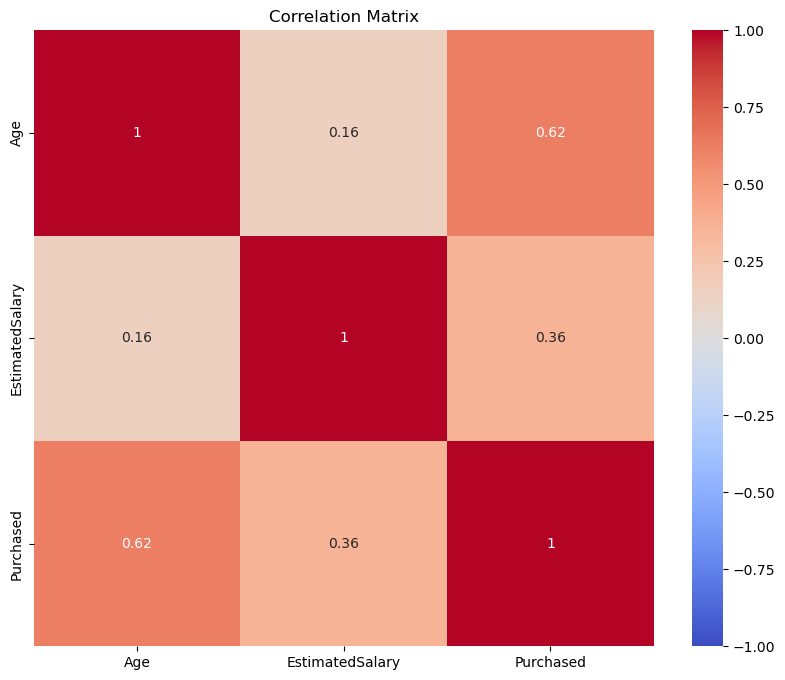

In [7]:
cm = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [9]:
# Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
                                    random_state=1)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [10]:
y_pred = tree_model.predict(X_test)

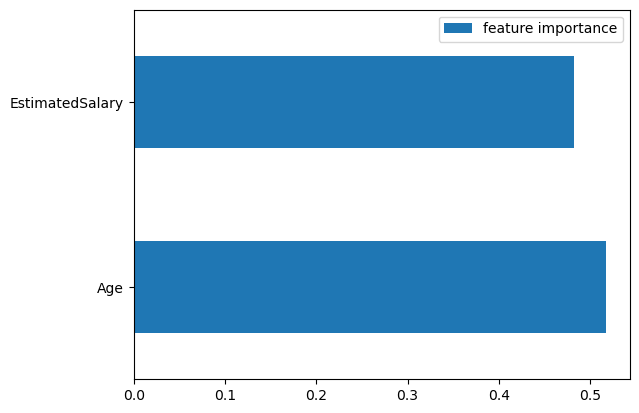

In [27]:
feat_importances = tree_model.feature_importances_
pd.DataFrame(feat_importances.reshape(1, -1),
             columns=X.columns, 
             index=['feature importance']).T\
    .plot(kind='barh')
plt.show()

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.79      0.77      0.78        43

    accuracy                           0.84       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120



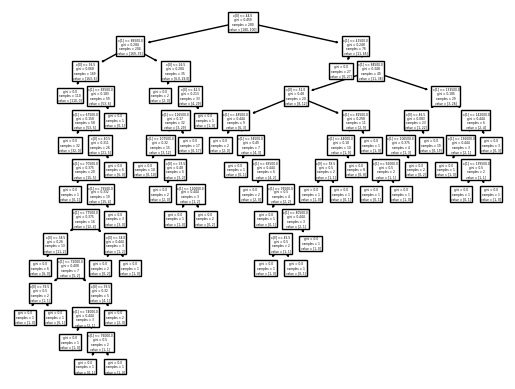

In [29]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()